In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

Analisis de datos
-	Vamos a analizar datos de covid mexico a fecha actualizada del 14 octubre 2020.
-	Los datos de los que disponemos están clasificados por patologias ( distintas enfermedades)y descripciones especificas de cada paciente : Edad Sexo Origen
-	Además disponemos de si el paciente ha estado en contacto con un positivo y por tanto fechas de inicio de sintomatología , ingreso y en algunos casos de defunción.
-	El dataset dispone de datos especificos acerca de la hospitalizacion (UCI,Intubados,ect)
-	Estudiaremos si hay diferenciacion en el diagnostico entre hombre y mujeres
-	Se puede estudiar los positivos y negativos por sintomatologia de riesgo y patologías previas:
-	Contacto con otro positivo
-	Fumadores
-	Embarazo
-	Neumonía
-	Se puede estudiar los positivos y negativos atendiendo a datos epidemológicos:
-	Edad
-	Origen

Lista de predicciones
-	Regresión teniendo en cuenta la temporalidad (fecha).
-	Clasificacion por bloques de edad y tipo de enfermedad.
-	Clasificacion por sexo dependiendo de la tipología previa.
-	Posibilidad de contagio dependiendo del municipio.


Haz un planteamiento de problema, basándote en la metodología de un proyecto de Data Science que se vio al inicio del Bootcamp. 

En base al estudio de los datos , hemos decido estudiar en profundidad los siguientes conjunto de datos para predecir si te hacen la prueba o no
-	Entidad_res
-	Enfermedades : Obesidad, Hipertension, Neumonía
-	Edad

In [2]:
covid_mex = pd.read_csv('201114COVID19MEXICO.csv', encoding="ISO-8859-1")
covid_mex.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97


In [3]:
df = covid_mex.copy()
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [4]:
df.drop(["FECHA_ACTUALIZACION","ID_REGISTRO","ENTIDAD_UM","ENTIDAD_NAC"
                ,"ORIGEN","MIGRANTE","PAIS_NACIONALIDAD"],axis=1,inplace=True)

In [5]:
df

,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
0,9,2,21,114,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,1,2,2,2,2,1,1,3,97,97
1,4,1,5,18,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,2,1,1,1,3,97,97
2,4,2,9,10,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,2,2,1,2,99,1,1,3,97,1
3,4,2,15,104,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,99,1,1,3,97,2
4,12,1,15,106,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,2,1,1,1,3,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,4,1,30,44,1,2020-10-14,2020-10-14,9999-99-99,97,2,...,2,2,2,2,2,1,4,6,97,97
2604655,4,1,6,2,1,2020-10-11,2020-10-03,9999-99-99,97,2,...,2,2,2,2,2,2,97,6,97,97
2604656,10,1,15,58,2,2020-10-09,2020-10-07,9999-99-99,2,2,...,2,2,2,2,2,2,97,1,97,2
2604657,12,1,15,63,1,2020-10-01,2020-09-30,9999-99-99,97,2,...,2,2,2,2,1,2,97,6,97,97


In [6]:
df["CLASIFICACION_FINAL"].value_counts()

7    1222753
3     973331
6     325954
5      45279
1      28872
4       7420
2       1050
Name: CLASIFICACION_FINAL, dtype: int64

### Modificación CLASIFICACION_FINAL (Positivo = 1, Negativo = 2 )

In [7]:
df["CLASIFICACION_FINAL"] = df["CLASIFICACION_FINAL"].replace({2:1,3:1,7:2})
df = df[~df["CLASIFICACION_FINAL"].isin([4,5,6])] #Borrado de clasificiones no concluyentes 

### Creacion variable Fallecidos (Si = 1, No = 0) 

In [8]:
df["Fallecidos"]= df["FECHA_DEF"].map(lambda x:2 if x=="9999-99-99" else 1)

<ipython-input-8-efbb0c3305cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fallecidos"]= df["FECHA_DEF"].map(lambda x:2 if x=="9999-99-99" else 1)


In [9]:
df

,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI,Fallecidos
0,9,2,21,114,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,2,2,2,2,1,1,1,97,97,2
1,4,1,5,18,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,1,1,1,1,97,97,2
2,4,2,9,10,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,2,1,2,99,1,1,1,97,1,1
3,4,2,15,104,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,99,1,1,1,97,2,1
4,12,1,15,106,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,1,1,1,1,97,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604469,6,2,15,58,2,2020-10-12,2020-10-12,2020-10-12,1,1,...,98,98,98,2,2,97,1,97,2,1
2604517,12,2,26,19,1,2020-10-13,2020-10-09,9999-99-99,97,2,...,2,2,2,1,2,97,1,97,97,2
2604538,6,1,15,70,2,2020-10-16,2020-10-09,2020-10-24,1,1,...,2,2,2,2,2,97,1,97,2,1
2604545,10,2,15,57,2,2020-11-09,2020-11-09,9999-99-99,2,2,...,2,2,2,2,2,97,1,97,2,2


In [10]:
for i in df.columns: 
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print("*********")

SECTOR
12    64.031948
4     25.186365
6      3.860681
9      2.765267
3      1.602556
8      0.776503
10     0.595057
5      0.592990
11     0.356243
13     0.081581
7      0.081536
2      0.053324
1      0.015499
99     0.000449
Name: SECTOR, dtype: float64
*********
SEXO
1    51.531038
2    48.468962
Name: SEXO, dtype: float64
*********
ENTIDAD_RES
9     22.286957
15    10.561247
11     5.847334
19     5.550255
14     3.828471
5      3.783413
21     3.673261
27     3.662164
28     3.482381
24     3.217107
26     3.049183
16     2.844197
30     2.842265
31     2.119356
25     1.924523
2      1.864550
8      1.839213
12     1.806734
10     1.766303
3      1.622637
1      1.497390
20     1.473940
22     1.459655
13     1.362665
32     1.178523
29     1.157903
23     1.114462
17     0.728704
4      0.712936
7      0.639441
18     0.556468
6      0.546360
Name: ENTIDAD_RES, dtype: float64
*********
MUNICIPIO_RES
5      4.644911
7      4.631299
39     3.648418
2      3.544150
4      3.493

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226006 entries, 0 to 2604656
Data columns (total 32 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int64 
 1   SEXO                 int64 
 2   ENTIDAD_RES          int64 
 3   MUNICIPIO_RES        int64 
 4   TIPO_PACIENTE        int64 
 5   FECHA_INGRESO        object
 6   FECHA_SINTOMAS       object
 7   FECHA_DEF            object
 8   INTUBADO             int64 
 9   NEUMONIA             int64 
 10  EDAD                 int64 
 11  NACIONALIDAD         int64 
 12  EMBARAZO             int64 
 13  HABLA_LENGUA_INDIG   int64 
 14  INDIGENA             int64 
 15  DIABETES             int64 
 16  EPOC                 int64 
 17  ASMA                 int64 
 18  INMUSUPR             int64 
 19  HIPERTENSION         int64 
 20  OTRA_COM             int64 
 21  CARDIOVASCULAR       int64 
 22  OBESIDAD             int64 
 23  RENAL_CRONICA        int64 
 24  TABAQUISMO           int

In [12]:
df.corr().style.background_gradient(cmap="coolwarm")

,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,UCI,Fallecidos
SECTOR,1.000000,-0.006064,-0.065284,-0.088379,-0.247038,0.246315,-0.013637,-0.101930,0.025829,-0.003054,0.096355,0.094972,0.001761,-0.004350,-0.005285,-0.005813,0.002308,0.011001,-0.004599,-0.001350,-0.004017,-0.005660,-0.378575,0.033861,0.040359,0.125669,0.246425,0.180991
SEXO,-0.006064,1.000000,0.014464,0.013812,0.082793,-0.083038,-0.005479,0.023272,0.009678,0.992770,0.005675,0.005921,0.004246,0.004213,0.005181,0.004042,0.004572,0.005804,0.003738,0.005304,0.003499,-0.000241,0.030249,0.000374,-0.001941,-0.047793,-0.082934,-0.070618
ENTIDAD_RES,-0.065284,0.014464,1.000000,0.276440,0.049862,-0.049549,0.000925,0.027115,-0.005546,0.013692,-0.017842,-0.017907,-0.010218,-0.009786,-0.010066,-0.013011,-0.011782,-0.011472,-0.009085,-0.011223,-0.008875,-0.005028,0.023838,0.049298,0.046202,-0.065540,-0.049444,-0.027522
MUNICIPIO_RES,-0.088379,0.013812,0.276440,1.000000,0.075762,-0.076218,-0.000660,0.020317,-0.006397,0.012833,-0.013808,-0.013533,-0.009854,-0.009914,-0.009796,-0.010868,-0.009579,0.001760,-0.008705,-0.009195,-0.009517,-0.008505,0.033089,0.006673,0.003854,-0.059339,-0.076170,-0.034303
TIPO_PACIENTE,-0.247038,0.082793,0.049862,0.075762,1.000000,-0.989563,0.040881,0.305592,-0.011610,0.081689,-0.025750,-0.027132,-0.002434,0.007424,0.009595,0.011482,-0.004202,0.029592,0.009071,0.006110,0.006279,0.010347,0.257433,0.032734,0.025158,-0.160946,-0.988769,-0.494258
INTUBADO,0.246315,-0.083038,-0.049549,-0.076218,-0.989563,1.000000,0.064319,-0.308323,0.011884,-0.081548,0.025218,0.026389,0.002142,-0.007830,-0.009934,-0.011105,0.003797,-0.028966,-0.009328,-0.006474,-0.006584,-0.010516,-0.250728,-0.033759,-0.025876,0.167436,0.999177,0.493808
NEUMONIA,-0.013637,-0.005479,0.000925,-0.000660,0.040881,0.064319,1.000000,-0.032201,0.003552,-0.002751,-0.004757,-0.006084,-0.002017,-0.002774,-0.002458,0.002441,-0.002245,0.004001,-0.001992,-0.002447,-0.002431,-0.001756,0.062933,-0.007090,-0.004258,0.059516,0.064230,0.016732
EDAD,-0.101930,0.023272,0.027115,0.020317,0.305592,-0.308323,-0.032201,1.000000,-0.015959,0.022715,-0.010418,-0.009988,-0.005560,0.009482,0.012729,0.012333,-0.014286,0.014737,0.009842,0.005904,0.010301,0.011769,0.108532,0.026408,0.019749,-0.140874,-0.308434,-0.294840
NACIONALIDAD,0.025829,0.009678,-0.005546,-0.006397,-0.011610,0.011884,0.003552,-0.015959,1.000000,0.009615,0.002253,0.002282,-0.001094,-0.001417,-0.001837,-0.001258,-0.001166,-0.001717,-0.001241,-0.000518,-0.001645,-0.001756,-0.010632,-0.001834,-0.001008,0.016775,0.011876,0.010792
EMBARAZO,-0.003054,0.992770,0.013692,0.012833,0.081689,-0.081548,-0.002751,0.022715,0.009615,1.000000,0.012048,0.012391,0.009210,0.009423,0.010475,0.009355,0.009677,0.010178,0.009029,0.010618,0.008708,0.004819,0.029920,0.001505,-0.000818,-0.048159,-0.081433,-0.069280


<AxesSubplot:>

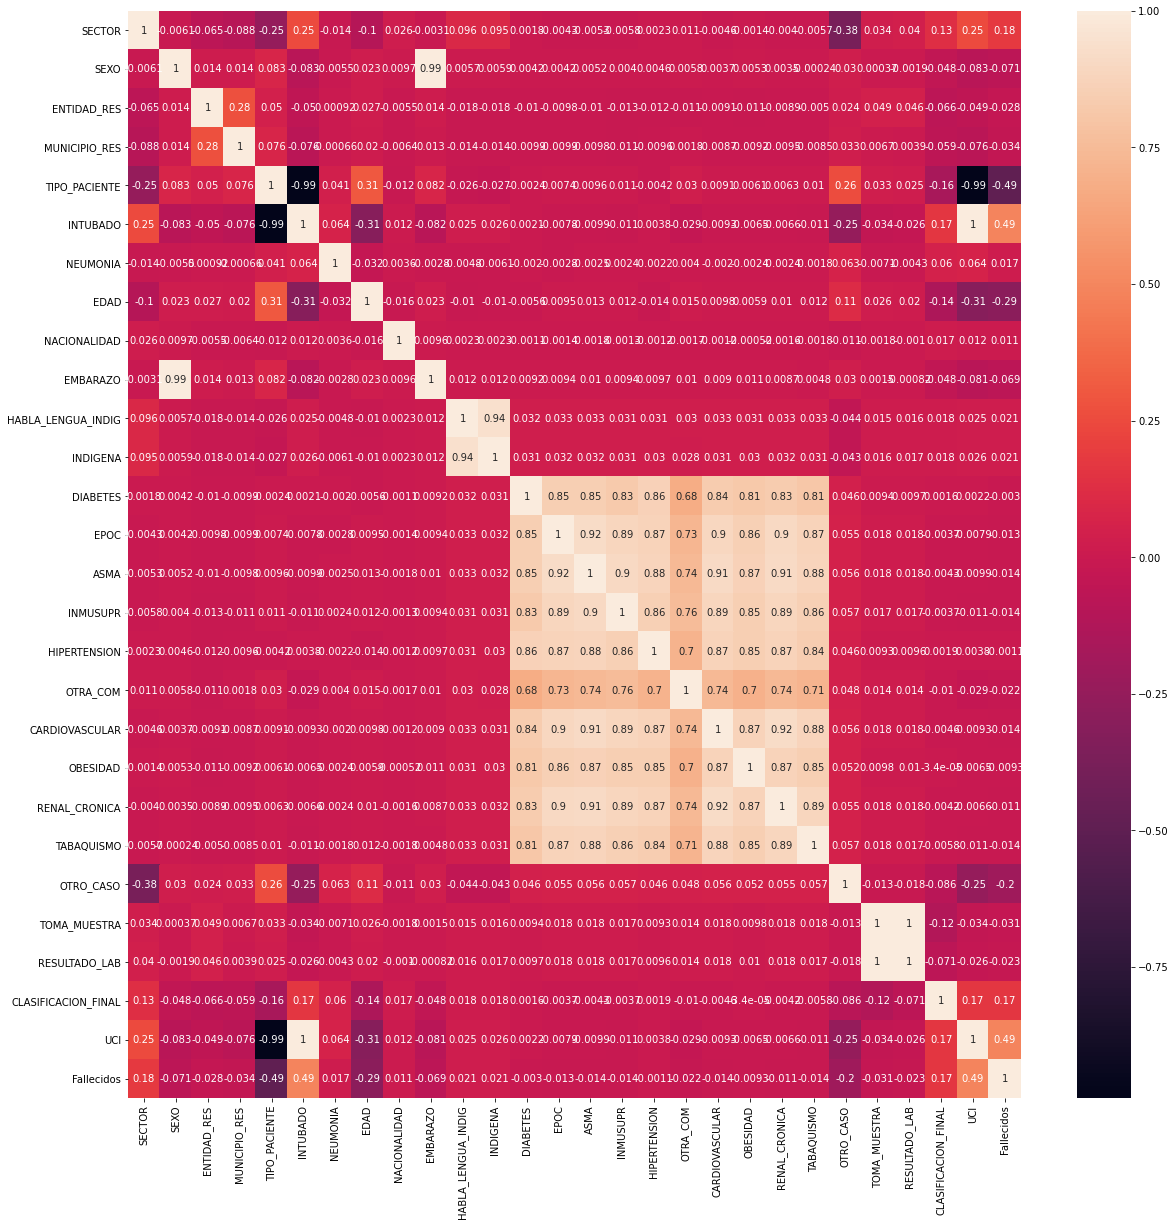

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

# Seccion 2

## Obtener información: Visualización 

### Numero de positivos 

In [14]:
positivos = df["CLASIFICACION_FINAL"][df["CLASIFICACION_FINAL"]==1].value_counts()
positivos

1    1003253
Name: CLASIFICACION_FINAL, dtype: int64

### Numero de Defunciones

In [15]:
fallecidos = len(df[df["Fallecidos"]==1])
fallecidos

123829

### Número de positivos en cada estado

In [16]:
positivo_estado = df[df["CLASIFICACION_FINAL"]==1]
dfmun= positivo_estado.groupby("ENTIDAD_RES")["CLASIFICACION_FINAL"].sum()
dfmun

ENTIDAD_RES
1      11209
2      24465
3      13470
4       6609
5      37494
6       6920
7       7616
8      24809
9     179134
10     17434
11     54017
12     22911
13     17179
14     37341
15    103240
16     26677
17      7306
18      6935
19     59841
20     22882
21     37575
22     17178
23     13885
24     31577
25     22966
26     40329
27     35602
28     33653
29      8768
30     38289
31     22611
32     13331
Name: CLASIFICACION_FINAL, dtype: int64

### Los nombres de los 3 estados con mayor número de positivos

In [17]:
dfmun.sort_values()

ENTIDAD_RES
4       6609
6       6920
18      6935
17      7306
7       7616
29      8768
1      11209
32     13331
3      13470
23     13885
22     17178
13     17179
10     17434
31     22611
20     22882
12     22911
25     22966
2      24465
8      24809
16     26677
24     31577
28     33653
27     35602
14     37341
5      37494
21     37575
30     38289
26     40329
11     54017
19     59841
15    103240
9     179134
Name: CLASIFICACION_FINAL, dtype: int64

- **Entidad 9:** Mexico DF tiene 179.134 positivos   
- **Entidad 15:** Mexico tiene 103.240 positivos
- **Entidad 19:** Nuevo León tiene 59.841 positivos

### Edad promedio de los positivos 

In [18]:
positivo_estado.groupby("CLASIFICACION_FINAL")["EDAD"].mean()

CLASIFICACION_FINAL
1    44.323493
Name: EDAD, dtype: float64

### Edad promedio de los que han fallecido

In [19]:
edad_fallecidos = df[df["Fallecidos"]==1]
edad_fallecidos.groupby("Fallecidos")["EDAD"].mean()

Fallecidos
1    62.28633
Name: EDAD, dtype: float64

### Tiempo entre la columna FECHA_SINTOMAS y la columna FECHA_DEF para los que han fallecido

In [20]:
df_ff = df[(df['FECHA_DEF']!="9999-99-99") & (df["Fallecidos"]==1)]
df_ff

,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI,Fallecidos
2,4,2,9,10,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,2,1,2,99,1,1,1,97,1,1
3,4,2,15,104,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,99,1,1,1,97,2,1
6,12,2,9,15,1,2020-03-29,2020-03-25,2020-04-05,97,1,...,2,2,2,1,1,1,1,97,97,1
9,4,2,14,67,2,2020-03-27,2020-03-27,2020-03-31,2,1,...,1,2,2,2,1,1,1,97,2,1
17,13,1,21,85,2,2020-03-28,2020-03-23,2020-04-05,2,1,...,1,2,2,2,1,1,1,97,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604170,12,2,5,35,2,2020-10-27,2020-10-19,2020-10-30,2,1,...,2,2,2,2,2,97,1,97,2,1
2604249,10,2,15,57,2,2020-10-09,2020-10-07,2020-10-23,2,2,...,2,2,2,2,2,97,1,97,2,1
2604459,10,2,15,15,2,2020-10-03,2020-10-01,2020-10-20,2,2,...,2,2,2,2,2,97,1,97,2,1
2604469,6,2,15,58,2,2020-10-12,2020-10-12,2020-10-12,1,1,...,98,98,98,2,2,97,1,97,2,1


In [21]:
df_ff["Sintomas_DEF"]= pd.to_datetime(df_ff['FECHA_DEF']) - pd.to_datetime(df_ff['FECHA_SINTOMAS'])
df_ff[['FECHA_SINTOMAS','FECHA_DEF',"Sintomas_DEF"]]

<ipython-input-21-83913968a570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ff["Sintomas_DEF"]= pd.to_datetime(df_ff['FECHA_DEF']) - pd.to_datetime(df_ff['FECHA_SINTOMAS'])


,FECHA_SINTOMAS,FECHA_DEF,Sintomas_DEF
2,2020-03-26,2020-03-30,4 days
3,2020-03-28,2020-04-02,5 days
6,2020-03-25,2020-04-05,11 days
9,2020-03-27,2020-03-31,4 days
17,2020-03-23,2020-04-05,13 days
...,...,...,...
2604170,2020-10-19,2020-10-30,11 days
2604249,2020-10-07,2020-10-23,16 days
2604459,2020-10-01,2020-10-20,19 days
2604469,2020-10-12,2020-10-12,0 days


### ¿Cuál es la enfermedad con más prevalencia en los positivos y en los que han fallecido?

In [22]:
lista_enfermedades = ["NEUMONIA","DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION",
       "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO"]
prevalencias_pos = dict()

for i in lista_enfermedades:
    print(i)
    print(df[(df["CLASIFICACION_FINAL"]== 1) & (df[i]==1)].shape[0] / df[df["CLASIFICACION_FINAL"]== 1].shape[0])
    print('*'*10)
    prevalencias_pos[i] =df[(df["CLASIFICACION_FINAL"]== 1) & (df[i]==1)].shape[0] / df[df["CLASIFICACION_FINAL"]== 1].shape[0]


NEUMONIA
0.1684380709551828
**********
DIABETES
0.14738754830536266
**********
EPOC
0.013420343622196993
**********
ASMA
0.025053500961372654
**********
INMUSUPR
0.010196829712943794
**********
HIPERTENSION
0.18749707202470364
**********
CARDIOVASCULAR
0.018611456930604744
**********
OBESIDAD
0.17074755819319754
**********
RENAL_CRONICA
0.01793067152552746
**********
TABAQUISMO
0.07314705263776934
**********


In [23]:
prevalencias_pos

{'NEUMONIA': 0.1684380709551828,
 'DIABETES': 0.14738754830536266,
 'EPOC': 0.013420343622196993,
 'ASMA': 0.025053500961372654,
 'INMUSUPR': 0.010196829712943794,
 'HIPERTENSION': 0.18749707202470364,
 'CARDIOVASCULAR': 0.018611456930604744,
 'OBESIDAD': 0.17074755819319754,
 'RENAL_CRONICA': 0.01793067152552746,
 'TABAQUISMO': 0.07314705263776934}

In [24]:
def maximo(d): 
    v=list(prevalencias_pos.values())
    k=list(prevalencias_pos.keys())
    return k[v.index(max(v))]

- **Enfermedad con mayor prevalencia entre los positivos en COVID**

In [25]:
maximo(prevalencias_pos)

'HIPERTENSION'

In [26]:
lista_enfermedades = ["NEUMONIA","DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION",
       "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO"]
prevalencias_pos = dict()
for i in lista_enfermedades:
    print(i)
    print(df[(df["Fallecidos"]== 1) & (df[i]==1)].shape[0] / df[df["Fallecidos"]== 1].shape[0])
    print('*'*10)
    prevalencias_pos[i] =df[(df["Fallecidos"]== 1) & (df[i]==1)].shape[0] / df[df["Fallecidos"]== 1].shape[0]

NEUMONIA
0.708210516114965
**********
DIABETES
0.3846191118397144
**********
EPOC
0.05358195576157443
**********
ASMA
0.019543079569406197
**********
INMUSUPR
0.031809996042930166
**********
HIPERTENSION
0.4507667832252542
**********
CARDIOVASCULAR
0.0600020996697058
**********
OBESIDAD
0.22725694304242142
**********
RENAL_CRONICA
0.08345379515299324
**********
TABAQUISMO
0.08535157354093145
**********


In [27]:
prevalencias_pos

{'NEUMONIA': 0.708210516114965,
 'DIABETES': 0.3846191118397144,
 'EPOC': 0.05358195576157443,
 'ASMA': 0.019543079569406197,
 'INMUSUPR': 0.031809996042930166,
 'HIPERTENSION': 0.4507667832252542,
 'CARDIOVASCULAR': 0.0600020996697058,
 'OBESIDAD': 0.22725694304242142,
 'RENAL_CRONICA': 0.08345379515299324,
 'TABAQUISMO': 0.08535157354093145}

In [28]:
def devuelve_maximo(d):
        v=list(d.values())
        k=list(d.keys())
        return k[v.index(max(v))]

- **Enfermedad con mayor prevalencia entre los fallecidos**

In [29]:
devuelve_maximo(prevalencias_pos)

'NEUMONIA'

## Gráficas

### Gráfica de barras del número de hombres y mujeres 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


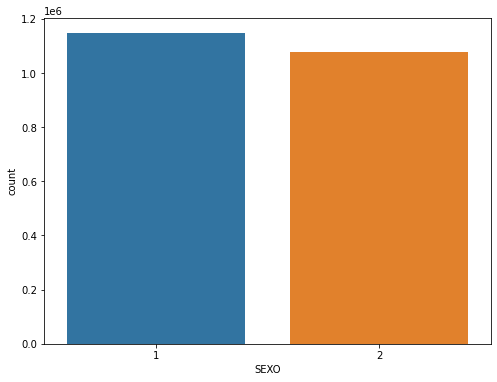

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['SEXO'])
plt.show()


###	Grafica de barras de los positivos y no positivos

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


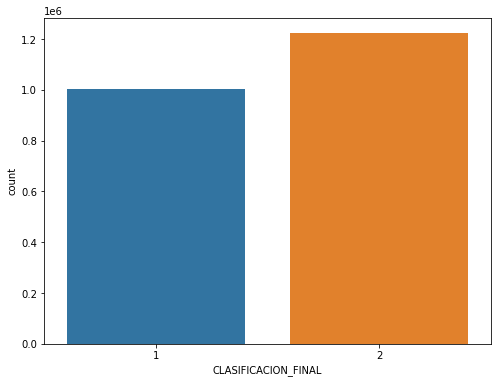

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['CLASIFICACION_FINAL'])
plt.show()

### Gráfica de barras del número de positivos por estado

In [32]:
dfpositivos = df[df["CLASIFICACION_FINAL"]==1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


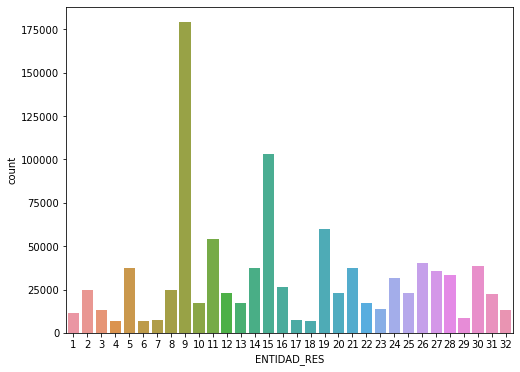

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(dfpositivos["ENTIDAD_RES"])
plt.show()

### Gráfica de barras del número de fallecidos por estado

In [34]:
dffallecidos = df[df["Fallecidos"]==1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


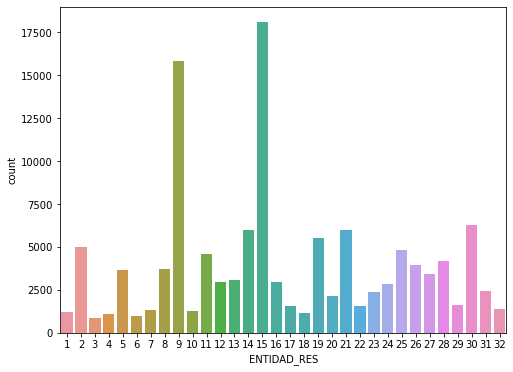

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(dffallecidos["ENTIDAD_RES"])
plt.show()

### Gráfica de barras del número de positivos por la columna SECTOR

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


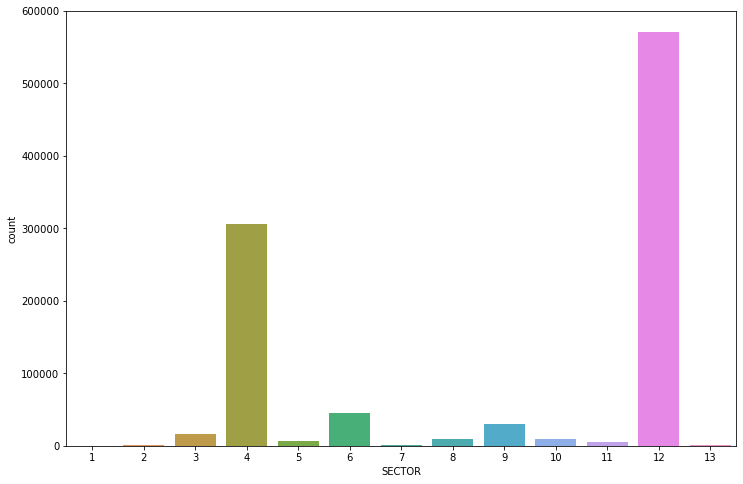

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(dfpositivos["SECTOR"])
plt.show()

### Histograma de la edad de los positivos

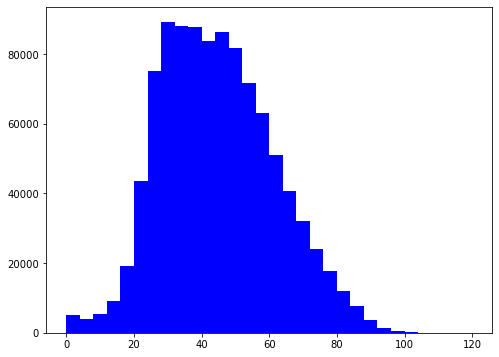

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(dfpositivos["EDAD"], bins=30 ,color="Blue") #bins se utiliza para la resolución de la gráfica
plt.show()

### Histograma de la edad de los no positivos

In [38]:
dfnegativos=df[df["CLASIFICACION_FINAL"]==2]

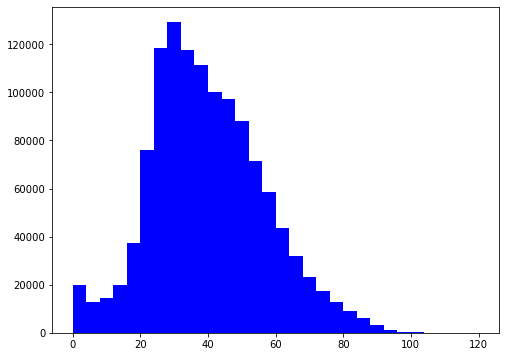

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(dfnegativos["EDAD"], bins=30 ,color="Blue") 
plt.show()

### Mapa de calor de México con el número de positivos por estado 

In [40]:
df_mapa1 = df.groupby('ENTIDAD_RES')['CLASIFICACION_FINAL'].sum().to_frame('CLASIFICACION_FINAL')

df_mapa1['ENTIDAD_RES'] = df_mapa1.index
df_mapa1.reset_index(drop=True, inplace=True)

mexico_geo = r'mexico22.json'
latitude = 23.6260
longitude = -102.5375

mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5.4)

mexico_map.choropleth(
geo_data=mexico_geo,
data=df_mapa1,
columns=["ENTIDAD_RES","CLASIFICACION_FINAL"],
key_on='feature.properties.name',
fill_color='Reds',
fill_opacity=0.7,
line_opacity=0.2,
legend_name='Positivos en Mexico'
)
mexico_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### Mapa de calor de México con el número de fallecidos por estado

In [41]:
df_mapa = df.groupby('ENTIDAD_RES')['Fallecidos'].sum().to_frame('Fallecidos')

df_mapa['ENTIDAD_RES'] = df_mapa.index
df_mapa.reset_index(drop=True, inplace=True)

mexico_geo = r'mexico22.json'
latitude = 23.6260
longitude = -102.5375

mexico_map = folium.Map(location=[latitude, longitude], zoom_start=5.3)

mexico_map.choropleth(
geo_data=mexico_geo,
data=df_mapa,
columns=["ENTIDAD_RES","Fallecidos"],
key_on='feature.properties.name',
fill_color='Reds',
fill_opacity=0.7,
line_opacity=0.2,
legend_name='Fallecidos en Mexico'
)
mexico_map

# Sección 3

## Objetivo: Predecir si se realiza la prueba

## Preprocesamiento 

In [42]:
dfN = covid_mex.copy()
dfN.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [43]:
dfN.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97


In [44]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9   TIPO_PACIENTE        int64 
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int64 
 14  NEUMONIA             int64 
 15  EDAD                 int64 
 16  NACIONALIDAD         int64 
 17  EMBARAZO             int64 
 18  HABLA_LENGUA_INDIG   int64 
 19  INDIGENA             int64 
 20  DIABETES             int64 
 21  EPOC                 int64 
 22  ASMA                 int64 
 23  INMUSUPR             int64 
 24  HIPERTENSION         int

### Limpieza de columnas

In [45]:
dfN= dfN[['ORIGEN', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'NEUMONIA',
       'EDAD','EMBARAZO', 'HABLA_LENGUA_INDIG',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA',"SECTOR"]] #'ENTIDAD_RES'

In [46]:
dfN

,ORIGEN,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,SECTOR
0,2,1,2020-03-18,2020-03-12,2,75,97,2,1,2,...,2,2,2,1,2,2,2,2,1,9
1,1,1,2020-04-02,2020-03-27,2,47,2,2,2,2,...,2,2,2,2,2,2,2,1,1,4
2,2,2,2020-03-26,2020-03-26,1,58,97,2,1,1,...,2,1,2,2,2,1,2,99,1,4
3,1,2,2020-03-28,2020-03-28,1,49,97,1,2,2,...,2,2,2,2,2,2,2,99,1,4
4,1,1,2020-03-31,2020-03-27,2,27,2,2,2,2,...,2,2,2,2,2,2,2,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2,1,2020-10-14,2020-10-14,2,50,2,2,2,2,...,2,2,2,2,2,2,2,2,1,4
2604655,1,1,2020-10-11,2020-10-03,2,67,2,2,2,2,...,2,1,2,2,2,2,2,2,2,4
2604656,2,2,2020-10-09,2020-10-07,2,79,2,2,2,2,...,2,2,2,2,2,2,2,2,2,10
2604657,2,1,2020-10-01,2020-09-30,2,36,2,2,1,2,...,2,2,2,2,2,2,2,1,2,12


In [47]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ORIGEN              int64 
 1   TIPO_PACIENTE       int64 
 2   FECHA_INGRESO       object
 3   FECHA_SINTOMAS      object
 4   NEUMONIA            int64 
 5   EDAD                int64 
 6   EMBARAZO            int64 
 7   HABLA_LENGUA_INDIG  int64 
 8   DIABETES            int64 
 9   EPOC                int64 
 10  ASMA                int64 
 11  INMUSUPR            int64 
 12  HIPERTENSION        int64 
 13  OTRA_COM            int64 
 14  CARDIOVASCULAR      int64 
 15  OBESIDAD            int64 
 16  RENAL_CRONICA       int64 
 17  TABAQUISMO          int64 
 18  OTRO_CASO           int64 
 19  TOMA_MUESTRA        int64 
 20  SECTOR              int64 
dtypes: int64(19), object(2)
memory usage: 417.3+ MB


### Creacion variable: dias desde sintomas, a ingreso

In [48]:
dfN["Dias_Ingreso"]=pd.to_datetime(dfN['FECHA_INGRESO']) - pd.to_datetime(dfN['FECHA_SINTOMAS'])
dfN["Dias_Ingreso"] = dfN["Dias_Ingreso"].apply(lambda x: x.days)

In [49]:
dfN

,ORIGEN,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,SECTOR,Dias_Ingreso
0,2,1,2020-03-18,2020-03-12,2,75,97,2,1,2,...,2,2,1,2,2,2,2,1,9,6
1,1,1,2020-04-02,2020-03-27,2,47,2,2,2,2,...,2,2,2,2,2,2,1,1,4,6
2,2,2,2020-03-26,2020-03-26,1,58,97,2,1,1,...,1,2,2,2,1,2,99,1,4,0
3,1,2,2020-03-28,2020-03-28,1,49,97,1,2,2,...,2,2,2,2,2,2,99,1,4,0
4,1,1,2020-03-31,2020-03-27,2,27,2,2,2,2,...,2,2,2,2,2,2,1,1,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2,1,2020-10-14,2020-10-14,2,50,2,2,2,2,...,2,2,2,2,2,2,2,1,4,0
2604655,1,1,2020-10-11,2020-10-03,2,67,2,2,2,2,...,1,2,2,2,2,2,2,2,4,8
2604656,2,2,2020-10-09,2020-10-07,2,79,2,2,2,2,...,2,2,2,2,2,2,2,2,10,2
2604657,2,1,2020-10-01,2020-09-30,2,36,2,2,1,2,...,2,2,2,2,2,2,1,2,12,1


In [50]:
for i in dfN.columns: 
    print(i)
    print(dfN[i].value_counts(normalize=True)*100)
    print("*********")

ORIGEN
2    65.369709
1    34.630291
Name: ORIGEN, dtype: float64
*********
TIPO_PACIENTE
1    84.747907
2    15.252093
Name: TIPO_PACIENTE, dtype: float64
*********
FECHA_INGRESO
2020-10-27    0.820453
2020-10-26    0.805864
2020-10-28    0.784748
2020-10-20    0.779296
2020-11-09    0.769237
                ...   
2020-02-01    0.003724
2020-01-11    0.003571
2020-01-04    0.003071
2020-11-14    0.001574
2020-01-01    0.001382
Name: FECHA_INGRESO, Length: 319, dtype: float64
*********
FECHA_SINTOMAS
2020-07-20    0.838958
2020-10-20    0.827594
2020-07-10    0.772116
2020-09-01    0.754302
2020-08-10    0.745587
                ...   
2020-01-01    0.011057
2020-01-03    0.009521
2020-01-04    0.009406
2020-01-02    0.008984
2020-11-14    0.000077
Name: FECHA_SINTOMAS, Length: 319, dtype: float64
*********
NEUMONIA
2     88.558195
1     10.738872
99     0.702933
Name: NEUMONIA, dtype: float64
*********
EDAD
30     2.548165
28     2.448727
31     2.424962
29     2.420739
27     2.3844

Unificar "otros" valores

In [51]:
lista99 = ["NEUMONIA","HABLA_LENGUA_INDIG","OTRO_CASO"]
for i in lista99:
    dfN[i] = dfN[i].replace({99:3})

In [52]:
dfN["EMBARAZO"] = dfN["EMBARAZO"].replace({97:3})


In [53]:
lista98 = ["EMBARAZO","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO","OTRO_CASO"]
for i in lista98:
    dfN[i] = dfN[i].replace({98:3})

In [54]:
for i in dfN.columns: 
    print(i)
    print(dfN[i].value_counts(normalize=True)*100)
    print("*********")

ORIGEN
2    65.369709
1    34.630291
Name: ORIGEN, dtype: float64
*********
TIPO_PACIENTE
1    84.747907
2    15.252093
Name: TIPO_PACIENTE, dtype: float64
*********
FECHA_INGRESO
2020-10-27    0.820453
2020-10-26    0.805864
2020-10-28    0.784748
2020-10-20    0.779296
2020-11-09    0.769237
                ...   
2020-02-01    0.003724
2020-01-11    0.003571
2020-01-04    0.003071
2020-11-14    0.001574
2020-01-01    0.001382
Name: FECHA_INGRESO, Length: 319, dtype: float64
*********
FECHA_SINTOMAS
2020-07-20    0.838958
2020-10-20    0.827594
2020-07-10    0.772116
2020-09-01    0.754302
2020-08-10    0.745587
                ...   
2020-01-01    0.011057
2020-01-03    0.009521
2020-01-04    0.009406
2020-01-02    0.008984
2020-11-14    0.000077
Name: FECHA_SINTOMAS, Length: 319, dtype: float64
*********
NEUMONIA
2    88.558195
1    10.738872
3     0.702933
Name: NEUMONIA, dtype: float64
*********
EDAD
30     2.548165
28     2.448727
31     2.424962
29     2.420739
27     2.384496


In [55]:
dfN.columns

Index(['ORIGEN', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'NEUMONIA', 'EDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'SECTOR', 'Dias_Ingreso'],
      dtype='object')

In [56]:
dfN1 = dfN.copy()
dfN1

,ORIGEN,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,SECTOR,Dias_Ingreso
0,2,1,2020-03-18,2020-03-12,2,75,3,2,1,2,...,2,2,1,2,2,2,2,1,9,6
1,1,1,2020-04-02,2020-03-27,2,47,2,2,2,2,...,2,2,2,2,2,2,1,1,4,6
2,2,2,2020-03-26,2020-03-26,1,58,3,2,1,1,...,1,2,2,2,1,2,3,1,4,0
3,1,2,2020-03-28,2020-03-28,1,49,3,1,2,2,...,2,2,2,2,2,2,3,1,4,0
4,1,1,2020-03-31,2020-03-27,2,27,2,2,2,2,...,2,2,2,2,2,2,1,1,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2,1,2020-10-14,2020-10-14,2,50,2,2,2,2,...,2,2,2,2,2,2,2,1,4,0
2604655,1,1,2020-10-11,2020-10-03,2,67,2,2,2,2,...,1,2,2,2,2,2,2,2,4,8
2604656,2,2,2020-10-09,2020-10-07,2,79,2,2,2,2,...,2,2,2,2,2,2,2,2,10,2
2604657,2,1,2020-10-01,2020-09-30,2,36,2,2,1,2,...,2,2,2,2,2,2,1,2,12,1


In [57]:
dfN1.drop(["NEUMONIA","DIABETES","EPOC","ASMA","INMUSUPR","OTRA_COM",
         "CARDIOVASCULAR","TABAQUISMO","FECHA_INGRESO","FECHA_SINTOMAS","RENAL_CRONICA"],axis=1,inplace=True)

In [58]:
dfN1.columns

Index(['ORIGEN', 'TIPO_PACIENTE', 'EDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG',
       'HIPERTENSION', 'OBESIDAD', 'OTRO_CASO', 'TOMA_MUESTRA', 'SECTOR',
       'Dias_Ingreso'],
      dtype='object')

In [59]:
dfN2 = dfN1.copy()
for i in ['ORIGEN', 'TIPO_PACIENTE',
       'HABLA_LENGUA_INDIG', 'HIPERTENSION', 'OBESIDAD', 'OTRO_CASO',
       'TOMA_MUESTRA']: #'ENTIDAD_RES'
    dfN2 = dfN2[dfN2[i] != 3]

In [60]:
dfN2.shape

(2212436, 11)

### Agrupación de edades en categorias (Joven, EdadMedia, AdultosMayores)

In [61]:
dfN2["EDAD"]=dfN2[dfN2["EDAD"]<80]

bins = np.linspace(min(dfN2["EDAD"]), max(dfN2["EDAD"]), 4)
bins

categorias = ['Joven', 'EdadMedia', 'AdultosMayores']
            
dfN2["EDAD"] = pd.cut(dfN2["EDAD"], bins, labels=categorias, include_lowest=True )

### Conversion en Dummys 

In [62]:
dummys_embarazo = pd.get_dummies(dfN2["EMBARAZO"])
dummys_embarazo = dummys_embarazo.rename(columns={2:"No embarazo",1:"Embarazo",3:"Si/No Embarazo"})
dummys_embarazo

dummys_origen = pd.get_dummies(dfN2["ORIGEN"])
dummys_origen = dummys_origen.rename(columns={2:"FUERA DE USMER",1:"USMER"})
dummys_origen

dummys_lengua = pd.get_dummies(dfN2["HABLA_LENGUA_INDIG"])
dummys_lengua = dummys_lengua.rename(columns={2:"No Habla Indigena",1:"Si Habla Indigena"})
dummys_lengua

dummys_hipertension = pd.get_dummies(dfN2["HIPERTENSION"])
dummys_hipertension = dummys_hipertension.rename(columns={2:"No hipertension",1:"Si hipertension"})
dummys_hipertension

dummys_obesidad = pd.get_dummies(dfN2["OBESIDAD"])
dummys_obesidad = dummys_obesidad.rename(columns={2:"No Obesidad",1:"Si Obesidad"})
dummys_obesidad

dummys_otroc = pd.get_dummies(dfN2["OTRO_CASO"])
dummys_otroc = dummys_otroc.rename(columns={2:"No Contacto",1:"Si Contacto"})

#dummys_res = pd.get_dummies(dfN2["ENTIDAD_RES"])

dummy_edad = pd.get_dummies(dfN2["EDAD"])


In [63]:
dfN2 = pd.concat([dfN2, dummys_embarazo,dummys_origen,dummys_lengua,dummys_hipertension,dummys_obesidad 
                 ,dummys_otroc,dummy_edad ], axis=1) #dummys_res


In [64]:
dfN2.drop(['ORIGEN','TIPO_PACIENTE',"HABLA_LENGUA_INDIG",'HIPERTENSION','OBESIDAD', 
           'OTRO_CASO',"EDAD","EMBARAZO","SECTOR"],axis=1,inplace=True) #, 'ENTIDAD_RES'

In [65]:
dfN2

,TOMA_MUESTRA,Dias_Ingreso,Embarazo,No embarazo,Si/No Embarazo,USMER,FUERA DE USMER,Si Habla Indigena,No Habla Indigena,Si hipertension,No hipertension,Si Obesidad,No Obesidad,Si Contacto,No Contacto,Joven,EdadMedia,AdultosMayores
0,1,6,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
1,1,6,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0
4,1,4,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0
6,1,4,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0
7,1,2,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2604655,2,8,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0
2604656,2,2,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2604657,2,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1


In [66]:
dfN3 = dfN2.copy()

# Sección 3 

## Modelo

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [87]:
dfN3

,TOMA_MUESTRA,Dias_Ingreso,Embarazo,No embarazo,Si/No Embarazo,USMER,FUERA DE USMER,Si Habla Indigena,No Habla Indigena,Si hipertension,No hipertension,Si Obesidad,No Obesidad,Si Contacto,No Contacto,Joven,EdadMedia,AdultosMayores
0,1,6,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
1,1,6,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0
4,1,4,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0
6,1,4,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0
7,1,2,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2604655,2,8,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0
2604656,2,2,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2604657,2,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1


## DBScan

In [89]:
X = dfN3.drop("TOMA_MUESTRA", axis=1).values
y = dfN3["TOMA_MUESTRA"].values

from sklearn.preprocessing import MinMaxScaler   #Escalar-Normalizar
X = MinMaxScaler().fit_transform(X)

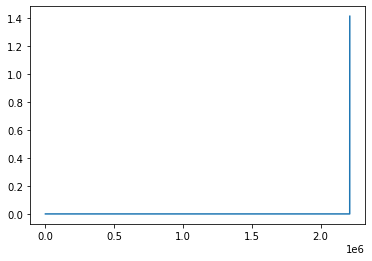

In [92]:
from sklearn.neighbors import NearestNeighbors
#Muestra los vecionos mas cercanos y nos ayuda a elegir epsilon
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show() #